In [2]:
import tensorflow as tf
import numpy as np
import pickle
np.random.seed(7)

In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\input_layer_4_6_15_4.pickle','rb') as file:
    input_data = pickle.load(file)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation,:]
print(input_data.shape)
x_train = input_data[:100000, :]
x_test = input_data[100000:105000, :]


(105000, 24)


In [4]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\output_layer_4_6_15_4.pickle','rb') as file:
    output_data = pickle.load(file)
output_data = np.transpose(output_data)
output_data = output_data[permutation,:]
y_train = output_data[:100000, :]
y_test = output_data[100000:105000, :]
print(output_data.shape)

(105000, 12)


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(150, input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.007)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 150, verbose = 2, validation_data = (x_test, y_test))


Train on 100000 samples, validate on 5000 samples
Epoch 1/150
100000/100000 - 3s - loss: 0.3025 - accuracy: 0.8751 - val_loss: 0.2647 - val_accuracy: 0.8874
Epoch 2/150
100000/100000 - 2s - loss: 0.2529 - accuracy: 0.8917 - val_loss: 0.2420 - val_accuracy: 0.8963
Epoch 3/150
100000/100000 - 2s - loss: 0.2315 - accuracy: 0.9031 - val_loss: 0.2196 - val_accuracy: 0.9082
Epoch 4/150
100000/100000 - 2s - loss: 0.2099 - accuracy: 0.9122 - val_loss: 0.2006 - val_accuracy: 0.9146
Epoch 5/150
100000/100000 - 3s - loss: 0.1949 - accuracy: 0.9169 - val_loss: 0.1936 - val_accuracy: 0.9171
Epoch 6/150
100000/100000 - 3s - loss: 0.1835 - accuracy: 0.9199 - val_loss: 0.1863 - val_accuracy: 0.9187
Epoch 7/150
100000/100000 - 2s - loss: 0.1753 - accuracy: 0.9223 - val_loss: 0.1751 - val_accuracy: 0.9209
Epoch 8/150
100000/100000 - 2s - loss: 0.1663 - accuracy: 0.9252 - val_loss: 0.1682 - val_accuracy: 0.9245
Epoch 9/150
100000/100000 - 2s - loss: 0.1584 - accuracy: 0.9281 - val_loss: 0.1653 - val_accu

Epoch 77/150
100000/100000 - 2s - loss: 0.0434 - accuracy: 0.9831 - val_loss: 0.0705 - val_accuracy: 0.9747
Epoch 78/150
100000/100000 - 2s - loss: 0.0429 - accuracy: 0.9834 - val_loss: 0.0647 - val_accuracy: 0.9770
Epoch 79/150
100000/100000 - 2s - loss: 0.0412 - accuracy: 0.9840 - val_loss: 0.0635 - val_accuracy: 0.9766
Epoch 80/150
100000/100000 - 2s - loss: 0.0414 - accuracy: 0.9838 - val_loss: 0.0726 - val_accuracy: 0.9751
Epoch 81/150
100000/100000 - 2s - loss: 0.0420 - accuracy: 0.9838 - val_loss: 0.0693 - val_accuracy: 0.9750
Epoch 82/150
100000/100000 - 2s - loss: 0.0396 - accuracy: 0.9847 - val_loss: 0.0654 - val_accuracy: 0.9773
Epoch 83/150
100000/100000 - 2s - loss: 0.0395 - accuracy: 0.9847 - val_loss: 0.0685 - val_accuracy: 0.9761
Epoch 84/150
100000/100000 - 2s - loss: 0.0408 - accuracy: 0.9843 - val_loss: 0.0729 - val_accuracy: 0.9747
Epoch 85/150
100000/100000 - 2s - loss: 0.0401 - accuracy: 0.9846 - val_loss: 0.0617 - val_accuracy: 0.9783
Epoch 86/150
100000/100000 -

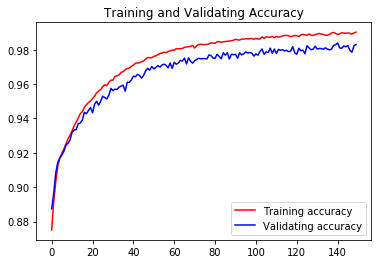

In [7]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
#plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [8]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Look_ahead_N\\Look_ahead_N_4_6_15_4_model.h5')

In [16]:
#json_string  = model.to_json()
#with open("C:\\Users\\Wilfred\\Desktop\\json_model.json", "w") as json_file:
#    json_file.write(json_string)

In [5]:
#model.save_weights('C:\\Users\\Wilfred\\Desktop\\Look_ahead_N_4_6_15_2_weights.h5')